# Introduction to regression models

Import relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_regression

## Load data

In [2]:
wine_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', delimiter=';')

In [3]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Get 100 samples with random state (seed) = 1

In [4]:
wine1 = wine_df.sample(n=100, random_state=1)
wine1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
75,8.8,0.410,0.64,2.2,0.093,9.0,42.0,0.99860,3.54,0.66,10.5,5
1283,8.7,0.630,0.28,2.7,0.096,17.0,69.0,0.99734,3.26,0.63,10.2,6
408,10.4,0.340,0.58,3.7,0.174,6.0,16.0,0.99700,3.19,0.70,11.3,6
1281,7.1,0.460,0.20,1.9,0.077,28.0,54.0,0.99560,3.37,0.64,10.4,6
1118,7.1,0.390,0.12,2.1,0.065,14.0,24.0,0.99252,3.30,0.53,13.3,6
...,...,...,...,...,...,...,...,...,...,...,...,...
529,9.9,0.630,0.24,2.4,0.077,6.0,33.0,0.99740,3.09,0.57,9.4,5
912,10.0,0.460,0.44,2.9,0.065,4.0,8.0,0.99674,3.33,0.62,12.2,6
1227,9.0,0.580,0.25,2.0,0.104,8.0,21.0,0.99769,3.27,0.72,9.6,5
1374,6.8,0.815,0.00,1.2,0.267,16.0,29.0,0.99471,3.32,0.51,9.8,3


## Create your own linear model

Plot pH in function of fixed acidity

<AxesSubplot:xlabel='fixed acidity', ylabel='pH'>

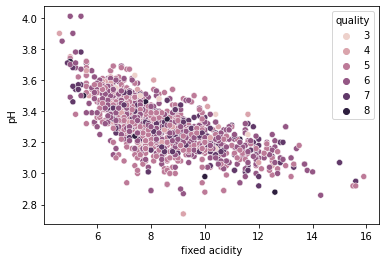

In [5]:
sns.scatterplot(data=wine_df, x="fixed acidity", y="pH", hue="quality")            

In [6]:
b1 = 2
x = wine1["fixed acidity"]
x = wine1.filter(["fixed acidity"])
y = wine1["pH"]

In [7]:
def calcule_y_hat(x, b0, b1):
    y_hat = b0 + b1 * x
    return y_hat

In [8]:
def calcul_error(y_pred, y):
    e=np.square(np.subtract(y_pred,y))
    e=e.sum()
    return e

In [10]:
def calcul_b1(alpha, m, b0, y_hat):
    b1 = b1 - alpha * 1/m * x (b1*x + b0 - y_hat)
    return b1

In [14]:
from scipy.stats import pearsonr
coeff_pearson,_ = pearsonr(x,y)
print("Coefficient de Pearson ={}".format(coeff_pearson))

Coefficient de Pearson =-0.6199410974873045


What can you say about pH and fixed acidity? are they correlated ? 

> When 0.5 > r > -0.5 : correlation. So they seems to be.

Try to find a linear model by hand. plot it with the sample set

Hint: define an intercept and slope. Then, plot it graphically

y = a * x + b, where a is slope and b is intercept

what is the best linear model you can find ? try to define different intercepts and slopes by hand

Compare to seaborn regplot

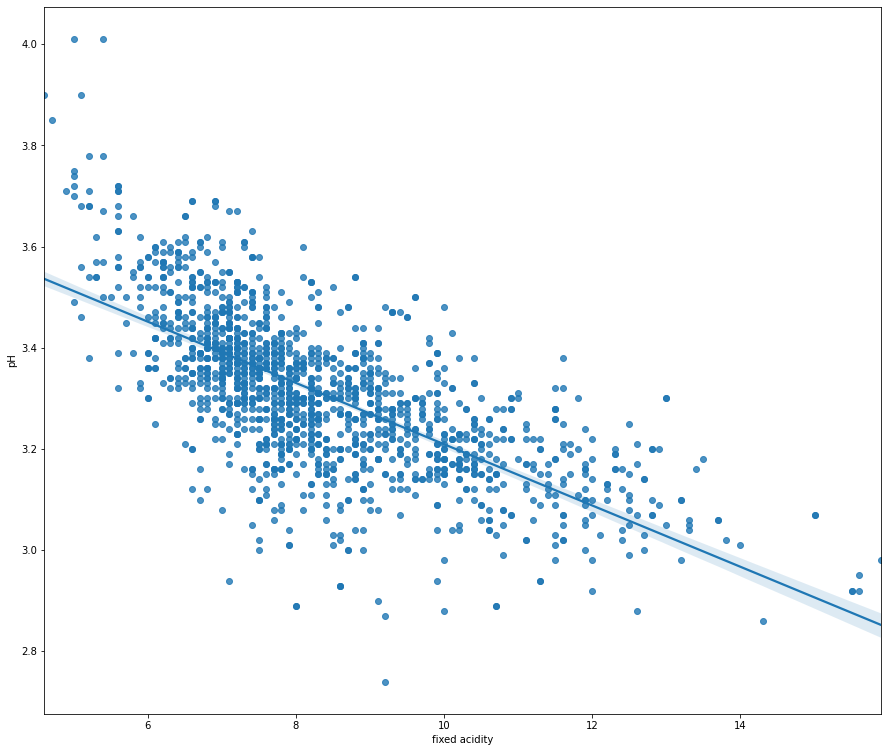

In [20]:
sample_wine_df = wine_df
plt.figure(figsize=(15, 13))
sns.regplot(y='pH', x='fixed acidity', data=sample_wine_df);

How far is your linear model from seaborn model?

How do you evaluate the performance of your linear models at each iteration ?

Try to create a method where each time you define a slope or intercept, you reduce the error of the model. Then, you iterate to find the best model

Hint: choose a fixed intercept, find the slope that reduce the error of the model. Then keep that slope, find the new intercept that reduce the error of the model ...

How many iterations did you tried ? what are the best intercept and slope you found? Are you closer to the seaborn linear model ?  

According to you ... is this the OLS method ? can you describe with your own words, how it works? how different is from your method ?

Compare with the Linear regression used in scikit learn

In [21]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

X = sample_wine_df[['fixed acidity']]
y = sample_wine_df['pH']

model.fit(X, y)

# model's slope (a)
print('Slope : ', model.coef_)

# model's intercept (b)
print('Intercept : ', model.intercept_)

Slope :  [-0.06056103]
Intercept :  3.8149590111969203


Are you close to these values ?

How do you interpret these values? What do they say about the pH and fixed acidity?

## inference analysis

Get a new sample of 100 with different random state (seed) = 60

In [22]:
sample_wine_df = wine_df.sample(n=100, random_state=60)
sample_wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
31,6.9,0.685,0.00,2.5,0.105,22.0,37.0,0.99660,3.46,0.57,10.6,6
844,9.9,0.250,0.46,1.7,0.062,26.0,42.0,0.99590,3.18,0.83,10.6,6
1573,6.0,0.580,0.20,2.4,0.075,15.0,50.0,0.99467,3.58,0.67,12.5,6
150,7.3,0.330,0.47,2.1,0.077,5.0,11.0,0.99580,3.33,0.53,10.3,6
258,7.7,0.410,0.76,1.8,0.611,8.0,45.0,0.99680,3.06,1.26,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1350,9.0,0.600,0.29,2.0,0.069,32.0,73.0,0.99654,3.34,0.57,10.0,5
677,8.6,0.800,0.11,2.3,0.084,12.0,31.0,0.99790,3.40,0.48,9.9,5
712,8.7,0.690,0.00,3.2,0.084,13.0,33.0,0.99920,3.36,0.45,9.4,5
1078,8.6,0.370,0.65,6.4,0.080,3.0,8.0,0.99817,3.27,0.58,11.0,5


Does your best linear model fit with this new sample set ?  Why ?


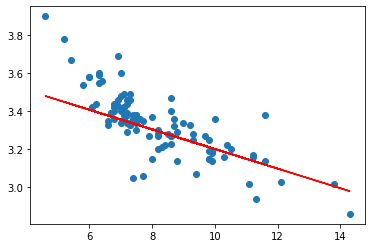

In [23]:
x = sample_wine_df["fixed acidity"]
y1 = sample_wine_df["pH"]
plt.scatter(x, y1)

y = -0.051601 * x +3.7176554637668797
plt.plot(x, y, color='red');

How can you solve the problem ?

# Predict wine quality - regression problem

## Simple Linear regression

Let's try to create a new linear regression. This time, try to find the best model to predict quality in function of pH

Follow the same steps as before: 
- choose a random sample with fixed seed
- use seaborn to see the linear model in this sample
- calculate the best linear regression
- check if the model fits with a new sample

In [36]:
from sklearn.linear_model import LinearRegression

sample_wine_df = wine_df.sample(n=1000, random_state=60)
model = LinearRegression()

X = sample_wine_df[['pH']]
y = sample_wine_df['quality']

model.fit(X, y)

print('Slope : ', model.coef_)
print('Intercept : ', model.intercept_)

Slope :  [-0.37895247]
Intercept :  6.9428063716941555


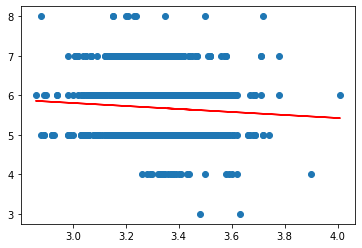

In [37]:
x = sample_wine_df["pH"]
y1 = sample_wine_df["quality"]
plt.scatter(x, y1)

y = model.coef_ * x + model.intercept_
plt.plot(x, y, color='red');

How good is this model performing? What is the error? is it low or high ?

> The model is bad. The wine quality does not rely on PH.

### Using Holdout method 

Use train split method to divide the dataset in 70% train set and 30% test set

In [33]:
from sklearn.model_selection import train_test_split

X3 = sample_wine_df[['pH']]
y3 = sample_wine_df['quality']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=.3, random_state=1)

model = LinearRegression()

model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print('Score : ', score)

Score :  0.005553564679026568


> The result is really bad. But it's not a surprise.

In [34]:
print('Slope : ', model.coef_)
print('Intercept : ', model.intercept_)

Slope :  [-0.39180754]
Intercept :  6.990407460803142


Is this score good or bad? What does it means? 

In [38]:
from sklearn.model_selection import train_test_split

X = sample_wine_df[['pH']]
y = sample_wine_df['fixed acidity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

model = LinearRegression()

model.fit(X_train, y_train)

score = model.score(X_test, y_test)
print('Score : ', score)

Score :  0.5678912331196782


In [ ]:
# le resultat est meilleur quand on test deux variables corrélées 

Try another feature. Replace pH with fixed acidity, volatile acidity, ...

Which feature increases this value? 

In [39]:
from sklearn.model_selection import train_test_split

# Choose your feature and your target
X = wine_df[["alcohol"]]
y = wine_df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

model = LinearRegression()

model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print('Score : ', score)

Score :  0.21302771003799204


In [40]:
from sklearn.model_selection import train_test_split
X = wine_df[["fixed acidity"]]
y = wine_df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

model = LinearRegression()

model.fit(X_train, y_train)

score = model.score(X_test, y_test)
print('Score : ', score)

Score :  0.010579330211374138


Do you think you can do better ?

> Yes, with a multiple linear regression

## Multi linear regression

Let's add multiple features in the regression model. Then create a new model and compare your results with Simple regression. Is it better or worst? 

In [42]:
X = wine_df[['pH','alcohol', 'fixed acidity', 'density', 'chlorides']]

In [44]:
from sklearn.model_selection import train_test_split

y = wine_df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

model = LinearRegression()

model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print('Score : ', score)

Score :  0.2328689133764189


In [47]:
y_prediction =  model.predict(X_test)

In [46]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score = r2_score(y_test,y_prediction)
print('R2 score : ', score)
print('MSE : ', mean_squared_error(y_test,y_prediction))
print('RMSE : ', np.sqrt(mean_squared_error(y_test,y_prediction)))

R2 score :  0.2328689133764189
MSE :  0.46690780993190717
RMSE :  0.6833065270666652


Try with all the features (all without column quality of course). 

Create a new model and compare with the last one. Is it better? Why? 



In [48]:
X = wine_df[['pH','alcohol', 'fixed acidity', 'density', "chlorides", "quality"]]
y = wine_df['quality']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

model = LinearRegression()


model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print('Score : ', score)

Score :  1.0


If you add the column quality in the variable X, what would happen ? 

> Data leakage

How can you find the best combination of features to increase the performance of the model?

In [49]:
wine_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [50]:
X = wine_df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]

In [52]:
from sklearn.feature_selection import SelectKBest, chi2
chi2(X, y)

sel = SelectKBest(chi2, k=3)
sel.fit_transform(X, y)
sel.get_support()

np.array(X.columns)[sel.get_support()]

array(['free sulfur dioxide', 'total sulfur dioxide', 'alcohol'],
      dtype=object)

# Predict wine quality - classification problem

## convert quality column in 2 classes

Create a classification version (good or bad) of target variable (quality). To do so, let's consider that the wine with quality equal of higher than 7 is good quality and the rest bad quality. 

You can call the new column goodquality

In [55]:
red_df = wine_df.copy()
red_df['goodquality'] = [1 if x >= 7 else 0 for x in red_df['quality']]

X = red_df.drop(['quality','goodquality'], axis = 1)
y = red_df['goodquality']

red_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [54]:
X = red_df.drop(['quality','goodquality'], axis = 1)
y = red_df['goodquality']

red_df['goodquality'].value_counts()
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


## Simple Logistic regression

Try to create a first logistic regression model from a sample

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

model =  LogisticRegression(max_iter=1000)

model.fit(X_train, y_train) 
score = model.score(X_test, y_test)
print('Score : ', score)

Score :  0.8958333333333334


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


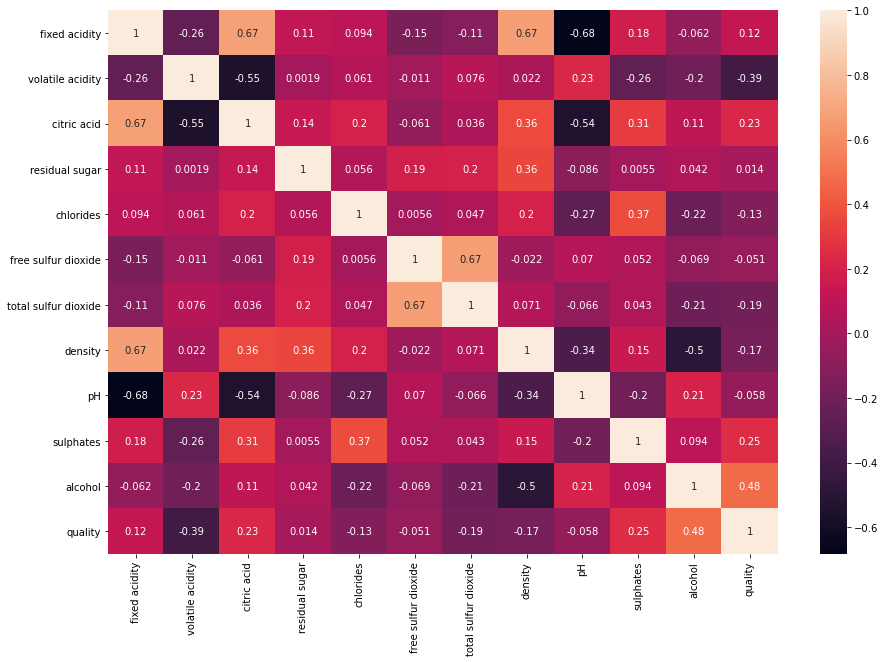

In [57]:
import matplotlib as plt
corr = wine_df.corr()

plt.pyplot.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)
corr

In [58]:
y_predicted = model.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
print('Confusion matrix : ', cm)

Confusion matrix :  [[414  11]
 [ 39  16]]


Text(69.0, 0.5, 'Truth')

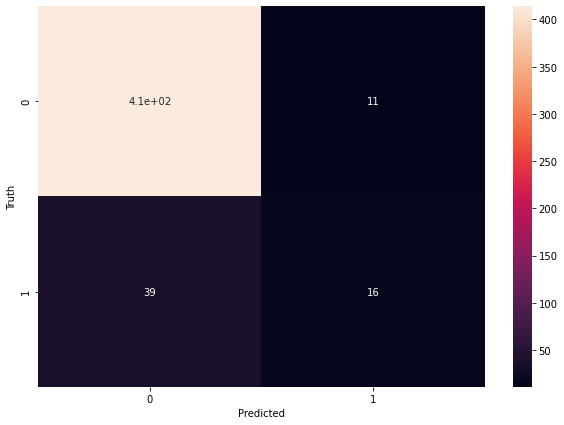

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Try different pair of data sets: (pH, goodquality), (fixed acidity, goodquality), (alcohol, goodquality) 

Which pair performs better?

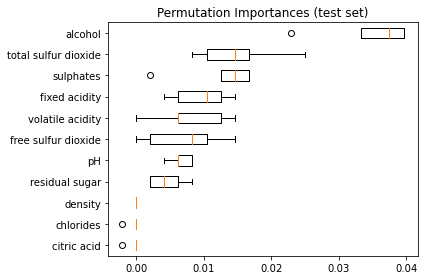

In [62]:
from sklearn.inspection import permutation_importance
result = permutation_importance(model, X_test, y_test, scoring='accuracy', random_state=42)
                               
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T, vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

## Multi logistic regression

Add new features to the model, try to find the best model reducing the error. 

Use everything you learned so far and good luck :)

In [63]:
X = red_df.drop(['quality','goodquality'], axis = 1)
y = red_df['goodquality']
red_df['goodquality'].value_counts()

0    1382
1     217
Name: goodquality, dtype: int64

In [64]:
# Separate feature variables and target variable
X = red_df[["alcohol","sulphates","total sulfur dioxide"]]
y = red_df['goodquality']

In [65]:
# Separate feature variables and target variable
X = red_df[["alcohol","sulphates"]]
y = red_df['goodquality']

In [66]:
# Separate feature variables and target variable
X = red_df[["alcohol","total sulfur dioxide"]]
y = red_df['goodquality']

In [67]:
# Separate feature variables and target variable
X = red_df[["volatile acidity","pH"]]
y = red_df['goodquality']

In [68]:
# Separate feature variables and target variable
X = red_df[["volatile acidity","alcohol"]]
y = red_df['goodquality']

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)
model = LogisticRegression()

model.fit(X_train, y_train) 
score = model.score(X_test, y_test)
print('Score : ', score)

Score :  0.88125


In [75]:
y_predicted = model.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[411,  14],
       [ 43,  12]])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


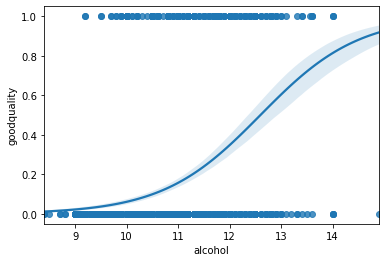

In [74]:
X = red_df["alcohol"]
y = red_df['goodquality']
sns.regplot(X, y, red_df, logistic = True);